In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [2]:
frame = pd.read_csv('./jena_climate_2009_2016.csv')

In [3]:
frame.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
frame.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


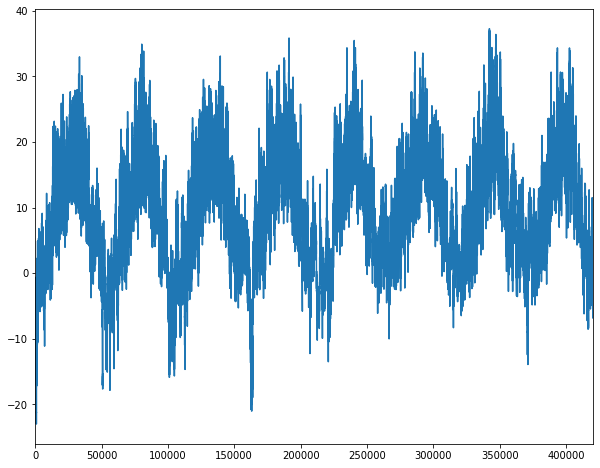

In [7]:
frame['T (degC)'].plot(figsize=(10, 8));

In [5]:
f = open('./jena_climate_2009_2016.csv')
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [6]:
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [11]:
float_data[0]

array([ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
        9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
        1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
        1.75000e+00,  1.52300e+02])

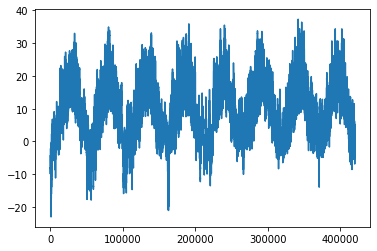

In [10]:
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp);

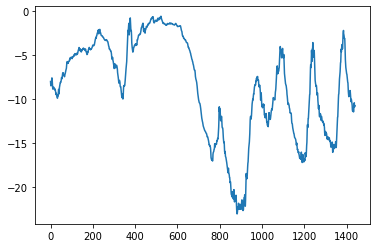

In [11]:
plt.plot(range(1440), temp[:1440]);

In [7]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [13]:
float_data.shape

(420551, 14)

In [ ]:
float_data[0]

In [8]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1        
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
            min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets


In [31]:
for sample, target in train_gen:
    print(sample)
    print(target)
    break

[[[ 0.7574661  -0.52723518 -0.58038346 ...  0.15552927 -0.03840485
    0.9361499 ]
  [ 0.81406697 -0.5283648  -0.58708494 ... -0.07874438  0.01308242
    1.03313277]
  [ 0.86359274 -0.45493921 -0.51671937 ... -0.28048003 -0.2100291
    1.00080515]
  ...
  [ 0.54875036 -0.64471613 -0.68202262 ... -0.41713966 -0.53611517
    0.91305874]
  [ 0.53460014 -0.63003101 -0.66638582 ... -0.34555604 -0.43314062
    0.84955805]
  [ 0.51809155 -0.63793838 -0.67197039 ...  0.13600646 -0.03840485
    0.8426307 ]]

 [[-0.16937327  1.23836794  1.24130306 ...  0.24012808  0.34774971
    0.92114064]
  [-0.13517691  0.96612843  0.96877608 ... -0.31952564 -0.35161911
    0.46624478]
  [-0.15404387  0.84412898  0.8492663  ...  0.02537724 -0.29584123
    0.57246412]
  ...
  [ 1.02514108  0.59674121  0.51084139 ... -0.40412445 -0.72490185
    0.75026606]
  [ 1.0546207   0.50637125  0.41925446 ... -0.57982969 -0.56614942
    0.6417376 ]
  [ 1.03339537  0.39905692  0.31426455 ... -0.28048003 -0.56614942
    0.6

In [9]:
lookback = 720
step = 6
delay = 144
batch_size = 128

In [10]:
train_gen = generator(float_data, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True, step=step, batch_size=batch_size)
val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=200001, max_index=300000, step=step, batch_size=batch_size)
test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=300001, max_index=None, step=step, batch_size=batch_size)
val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

In [17]:
float_data.shape

(420551, 14)

In [11]:
(lookback // step, float_data.shape[-1])

(120, 14)

In [21]:
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [23]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=5, validation_data=val_gen, validation_steps=400)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 400 steps
Epoch 1/5
228/500 [============>.................] - ETA: 5s - loss: 0.2522

KeyboardInterrupt: 

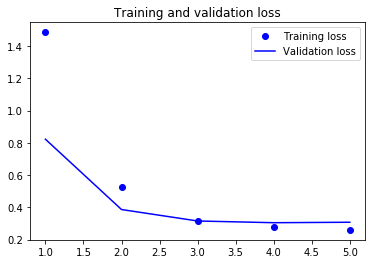

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# GRU

In [25]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae', metrics=['mse'])
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=5, validation_data=val_gen, validation_steps=400)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 400 steps
Epoch 1/5
500/500 [==============================] - 112s 223ms/step - loss: 0.3048 - mse: 0.1554 - val_loss: 0.2705 - val_mse: 0.1187
Epoch 2/5
500/500 [==============================] - 71s 142ms/step - loss: 0.2843 - mse: 0.1351 - val_loss: 0.2689 - val_mse: 0.1202
Epoch 3/5
500/500 [==============================] - 65s 130ms/step - loss: 0.2771 - mse: 0.1291 - val_loss: 0.2559 - val_mse: 0.1107
Epoch 4/5
500/500 [==============================] - 66s 133ms/step - loss: 0.2733 - mse: 0.1260 - val_loss: 0.2729 - val_mse: 0.1235
Epoch 5/5
500/500 [==============================] - 66s 132ms/step - loss: 0.2688 - mse: 0.1228 - val_loss: 0.2668 - val_mse: 0.1184


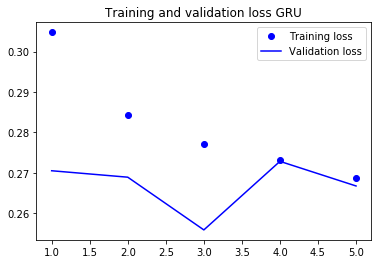

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss GRU')
plt.legend()
plt.show()

# recurrent dropout

In [27]:
model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae', metrics=['mse'])
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=5, validation_data=val_gen, validation_steps=400)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 400 steps
Epoch 1/5
500/500 [==============================] - 99s 198ms/step - loss: 0.3348 - mse: 0.1882 - val_loss: 0.2853 - val_mse: 0.1344
Epoch 2/5
500/500 [==============================] - 92s 184ms/step - loss: 0.3106 - mse: 0.1586 - val_loss: 0.2648 - val_mse: 0.1148
Epoch 3/5
500/500 [==============================] - 93s 185ms/step - loss: 0.3037 - mse: 0.1512 - val_loss: 0.2779 - val_mse: 0.1276
Epoch 4/5
500/500 [==============================] - 91s 182ms/step - loss: 0.2993 - mse: 0.1479 - val_loss: 0.2673 - val_mse: 0.1170
Epoch 5/5
500/500 [==============================] - 91s 182ms/step - loss: 0.2957 - mse: 0.1445 - val_loss: 0.2775 - val_mse: 0.1275


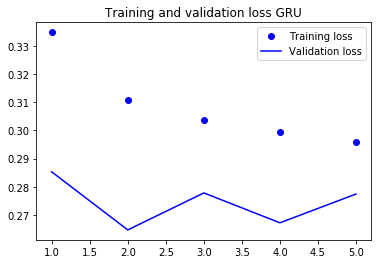

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss GRU')
plt.legend()
plt.show()

# Time Series Prediction using 1D conv net

In [20]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=100)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 10 steps
Epoch 1/20
500/500 [==============================] - 6s 12ms/step - loss: 0.3964 - val_loss: 0.3899
Epoch 2/20
500/500 [==============================] - 5s 11ms/step - loss: 0.3299 - val_loss: 0.2892
Epoch 3/20
500/500 [==============================] - 5s 11ms/step - loss: 0.3005 - val_loss: 0.3199
Epoch 4/20
500/500 [==============================] - 5s 11ms/step - loss: 0.2809 - val_loss: 0.3473
Epoch 5/20
500/500 [==============================] - 5s 11ms/step - loss: 0.2656 - val_loss: 0.2842
Epoch 6/20
500/500 [==============================] - 5s 11ms/step - loss: 0.2542 - val_loss: 0.2854
Epoch 7/20
500/500 [==============================] - 5s 11ms/step - loss: 0.2465 - val_loss: 0.5481
Epoch 8/20
500/500 [==============================] - 5s 11ms/step - loss: 0.2392 - val_loss: 0.4348
Epoch 9/20
500/500 [==============================] - 5s 11ms/step - loss: 0.2327 - val_loss: 0.553

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')